In [140]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler, RobustScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.impute import SimpleImputer 
import seaborn as sns
from matplotlib import pyplot as plt

In [128]:
df_train = pd.read_csv('adult_data_train.csv', na_values={'?'})
X_test = pd.read_csv('adult_data_reserved.csv', na_values={'?'})
df_train.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,label
0,32,Private,37210,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,1
1,43,Private,101950,Masters,14,Never-married,Exec-managerial,Not-in-family,White,Female,0,0,45,United-States,0
2,20,NaN,122244,HS-grad,9,Never-married,NaN,Not-in-family,White,Female,0,0,28,United-States,0
3,40,Local-gov,24763,Some-college,10,Divorced,Transport-moving,Unmarried,White,Male,6849,0,40,United-States,0
4,24,Private,113936,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,0


In [129]:
columns_with_na = ['workclass', 'occupation', 'native-country']
for col in columns_with_na:
    most_frequent_value = df_train[col].mode()[0]
    df_train[col].fillna(most_frequent_value, inplace=True)
    X_test[col].fillna(most_frequent_value, inplace=True)

In [130]:
X_train = df_train.drop(columns=['label'])
y_train = df_train['label']

In [131]:
df_all = pd.concat([X_train, X_test])
non_numeric_cols = df_all.select_dtypes(exclude='number').columns

for col in non_numeric_cols:
    le = LabelEncoder()
    df_all[col] = le.fit_transform(df_all[col])
    
X_train = df_all.iloc[:len(X_train)]
X_test = df_all.iloc[len(X_train):]    

In [132]:
X_train

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,32,3,37210,9,13,2,3,0,4,1,0,0,45,38
1,43,3,101950,12,14,4,3,1,4,0,0,0,45,38
2,20,3,122244,11,9,4,9,1,4,0,0,0,28,38
3,40,1,24763,15,10,0,13,4,4,1,6849,0,40,38
4,24,3,113936,9,13,4,9,3,4,1,0,0,40,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26043,35,5,179171,11,9,4,11,4,2,0,0,0,38,10
26044,39,3,421633,15,10,0,10,4,2,0,0,0,30,38
26045,55,3,82098,11,9,2,3,0,1,1,0,0,55,38
26046,26,3,50053,9,13,2,3,0,4,1,0,0,55,38


<Axes: xlabel='sex', ylabel='Count'>

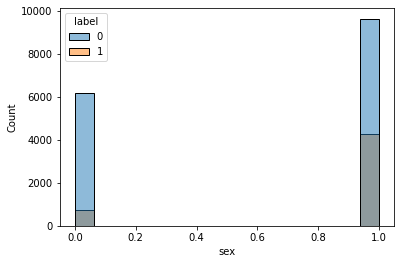

In [134]:
sns.histplot(data=pd.concat([X_tr, y_tr], axis=1), x='sex', hue='label')

In [141]:
scaler = RobustScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns, index=X_test.index)

X_tr, X_te, y_tr, y_te = train_test_split(X_train_scaled, y_train, test_size=0.1, 
                                                        random_state=41, stratify=y_train)
                                        

In [144]:
for num in range(5,20):
    neigh = KNeighborsClassifier(n_neighbors=num, weights='distance')
    neigh.fit(X_tr, y_tr)
    # f1 скор на параметрах по умолчанию
    print(num, f1_score(y_te, neigh.predict(X_te)) )
                                          



5 0.6371527777777778
6 0.6126295947219603
7 0.6327782646801051
8 0.6142322097378278
9 0.6377325066430469
10 0.6056603773584905
11 0.6298932384341637
12 0.6095060577819198
13 0.6207513416815742
14 0.6119402985074626
15 0.6175942549371635
16 0.6007462686567164
17 0.606115107913669
18 0.598322460391426
19 0.6105072463768115


In [145]:
neigh = KNeighborsClassifier(n_neighbors=10, weights='distance')
neigh.fit(X_train_scaled, y_train)
# f1 скор на параметрах по умолчанию
f1_score(y_train, neigh.predict(X_train_scaled))

0.9999202869669191

In [146]:
ans = list(neigh.predict(X_test_scaled))

In [147]:
print(ans)

[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 